In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.api import VAR
import statsmodels.api as sm
from statsmodels.tsa.base.datetools import dates_from_str

from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
register_matplotlib_converters()
from time import time

In [46]:
df = pd.read_csv("./pricedata.csv", parse_dates = ['Date'])
df = df.pivot(index = "Date", columns = "Symbol", values = "Close")
df = df[df.index > pd.to_datetime('2011-01-01')]
df = df[df.index < pd.to_datetime('2016-01-01')]
df.head()

Symbol,Brent Oil,Crude Oil WTI,Heating Oil,Natural Gas
Date,,,,
2011-01-03,94.84,91.55,2.5528,4.650
2011-01-04,93.53,89.38,2.5065,4.669
2011-01-05,95.50,90.30,2.5422,4.473
2011-01-06,94.52,88.38,2.5112,4.434
2011-01-07,93.33,88.03,2.4863,4.422


In [47]:
df.index = pd.DatetimeIndex(df.index)
df = np.log(df).diff().dropna()
model = VAR(df)
results = model.fit(4)
results.summary()

C:\Users\Casey\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 23, May, 2024
Time:                     12:42:26
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -33.6224
Nobs:                     1247.00    HQIC:                  -33.7969
Log likelihood:           14128.3    FPE:                1.89026e-15
AIC:                     -33.9021    Det(Omega_mle):     1.79060e-15
--------------------------------------------------------------------
Results for equation Brent Oil
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                   -0.000893         0.000510           -1.750           0.080
L1.Brent Oil             0.007977         0.071370            0.112           0.911
L1.Crude Oil WTI        -0.043277         0.

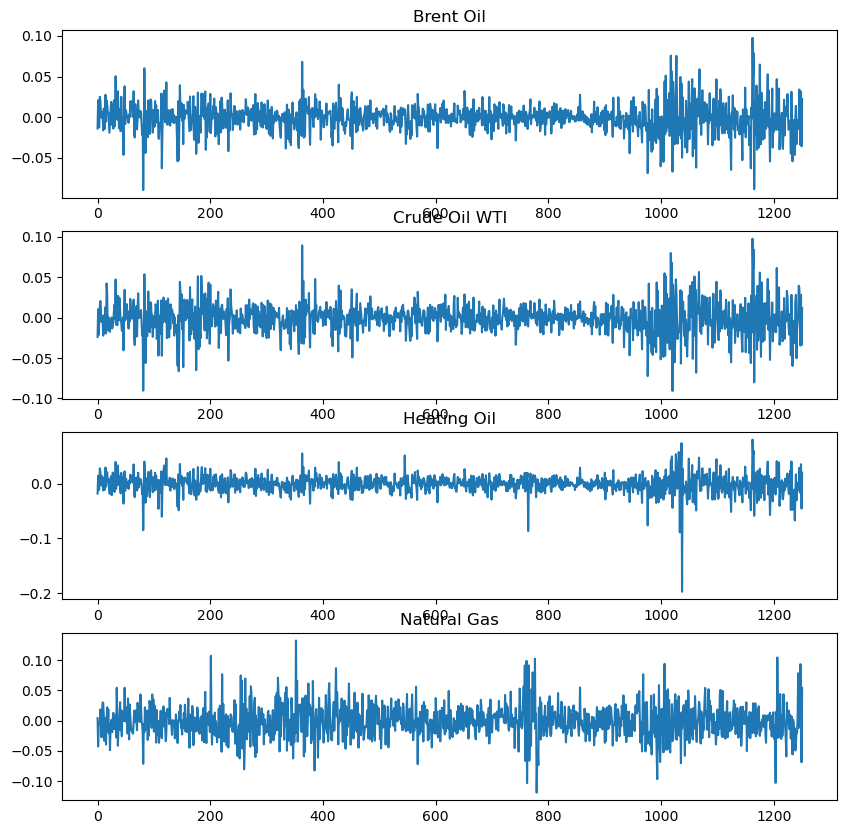

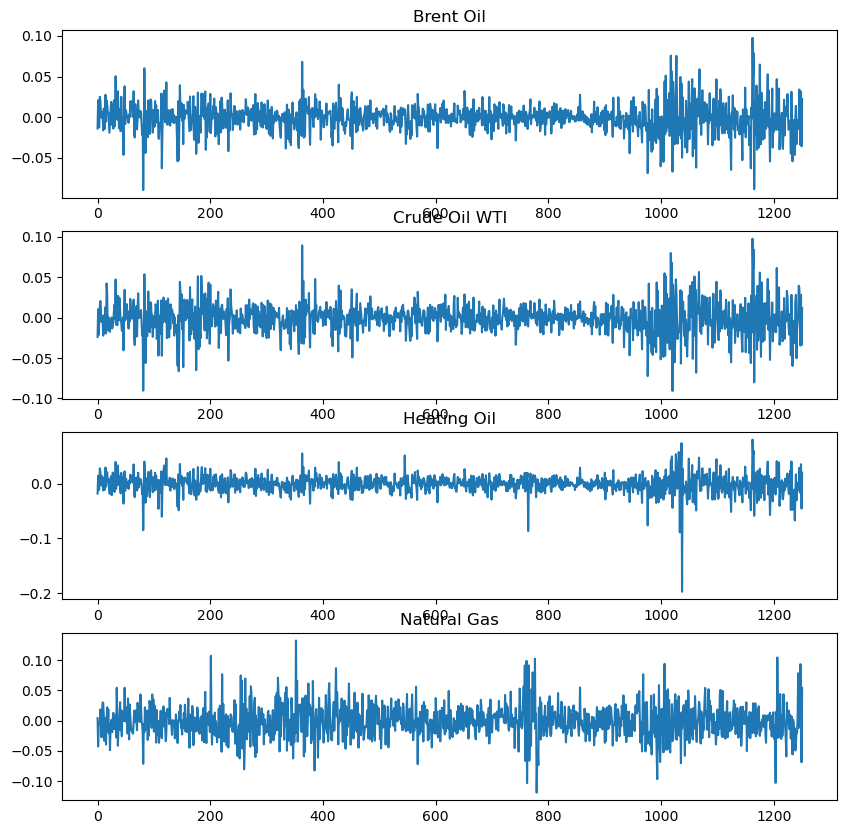

In [48]:
results.plot()

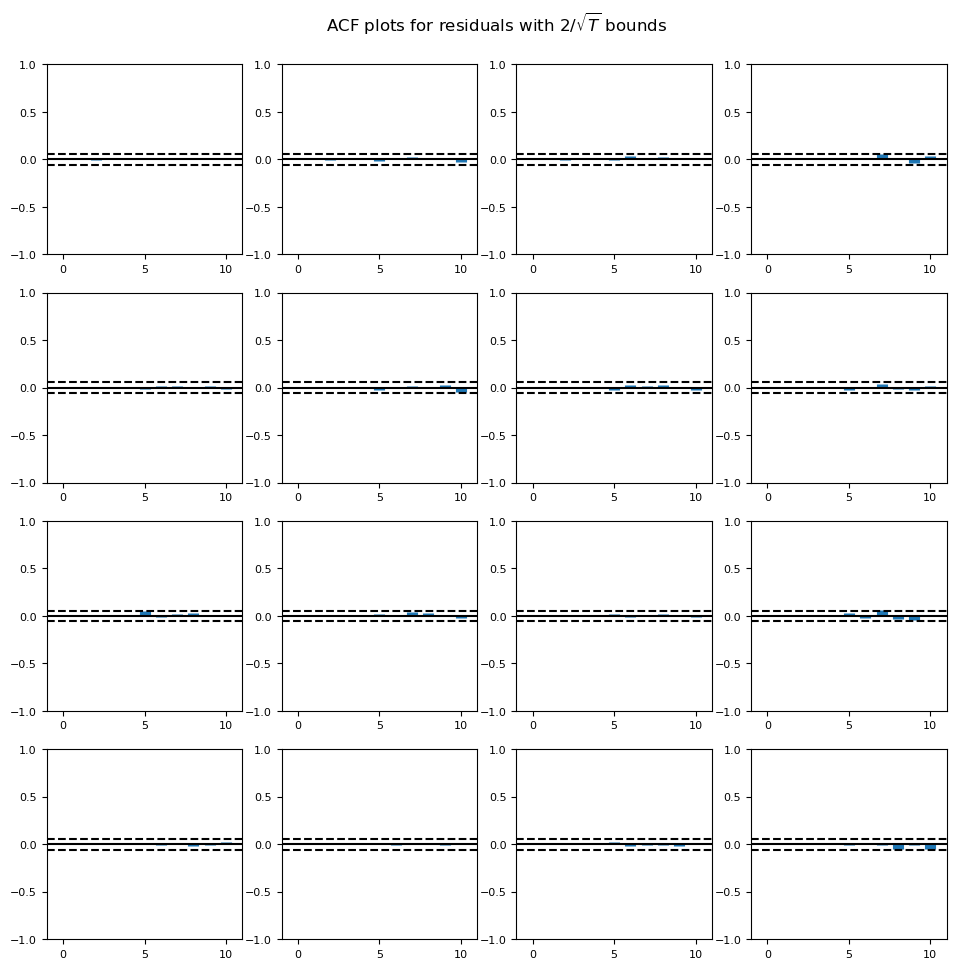

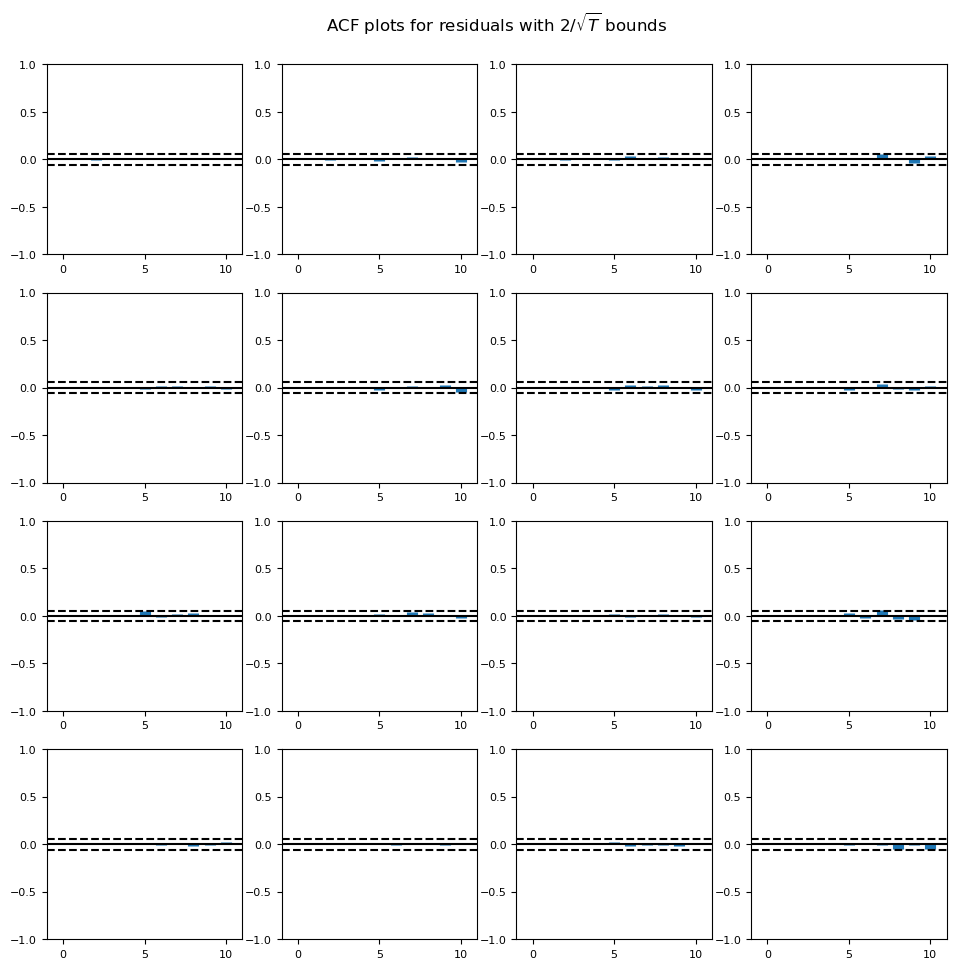

In [49]:
results.plot_acorr()

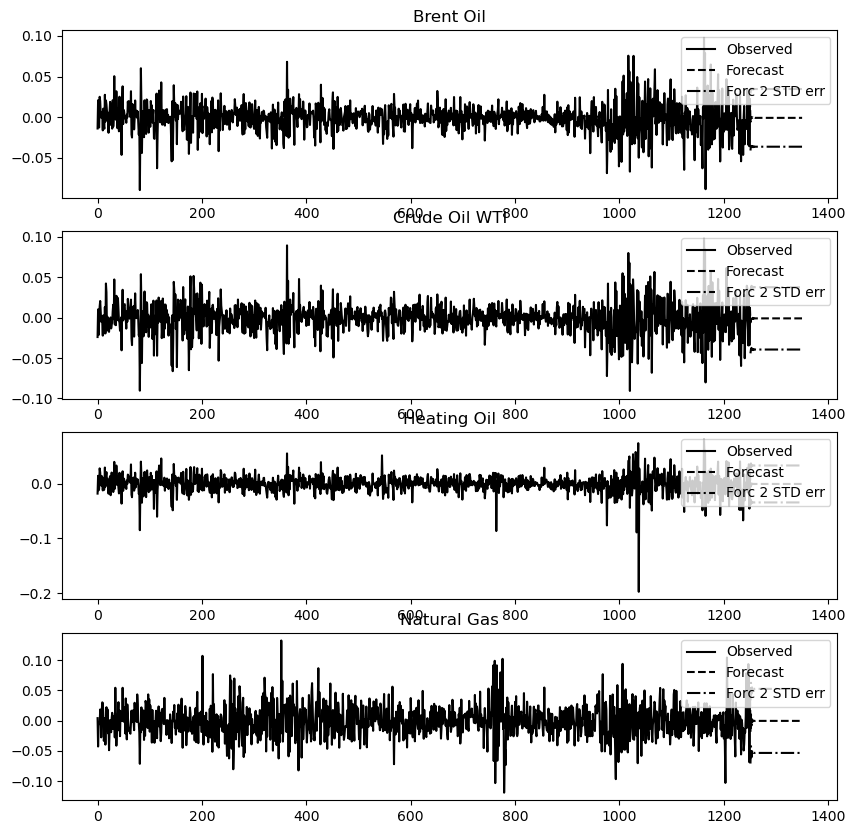

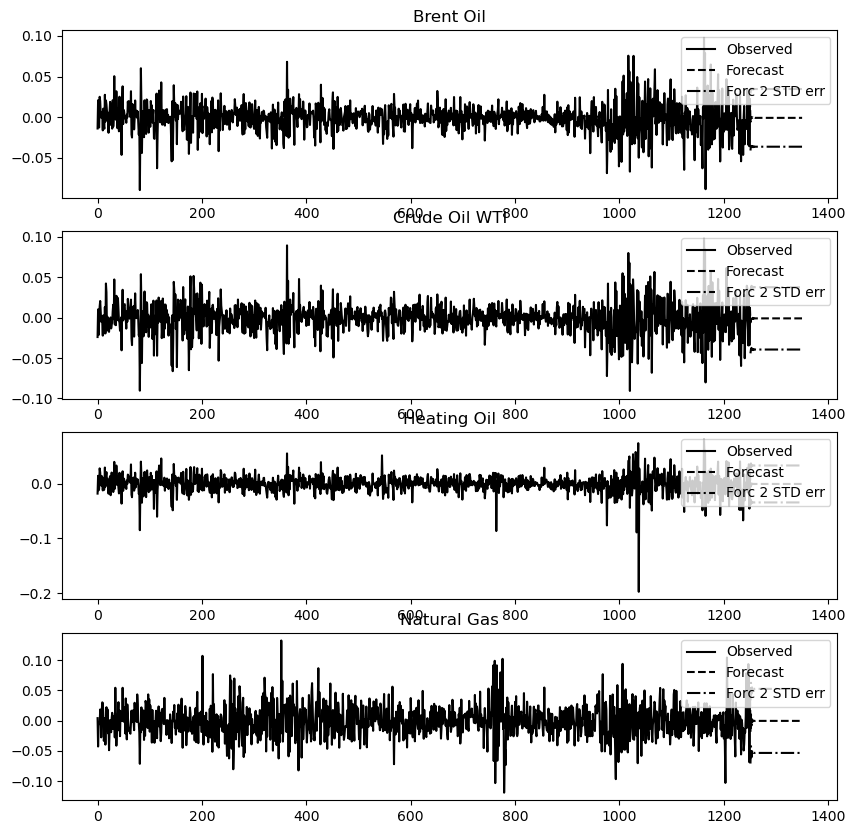

In [50]:
results.plot_forecast(100)

In [51]:
############## MINUTE DATA #########################

In [159]:
df = pd.read_csv('WTI_Minute_Data.csv', index_col = 0, parse_dates = ['Date'])
df.set_index("Date", inplace = True)
#df_2011 = df[df.index < pd.to_datetime("2011-07-01")]
#df_2011.head()

In [160]:
df

,Open,Close
Date,,
2011-01-02 20:15:00,91.280,91.260
2011-01-02 20:16:00,91.260,91.260
2011-01-02 20:17:00,91.250,91.260
2011-01-02 20:18:00,91.270,91.260
2011-01-02 20:19:00,91.250,91.250
...,...,...
2023-12-01 16:54:00,74.377,74.382
2023-12-01 16:55:00,74.377,74.387
2023-12-01 16:56:00,74.382,74.372


In [194]:
df_2011 = df[df.index < pd.to_datetime("2011-01-05")]
df_2011

,Open,Close
Date,,
2011-01-02 20:15:00,91.28,91.26
2011-01-02 20:16:00,91.26,91.26
2011-01-02 20:17:00,91.25,91.26
2011-01-02 20:18:00,91.27,91.26
2011-01-02 20:19:00,91.25,91.25
...,...,...
2011-01-04 23:55:00,89.19,89.21
2011-01-04 23:56:00,89.21,89.21
2011-01-04 23:57:00,89.20,89.19


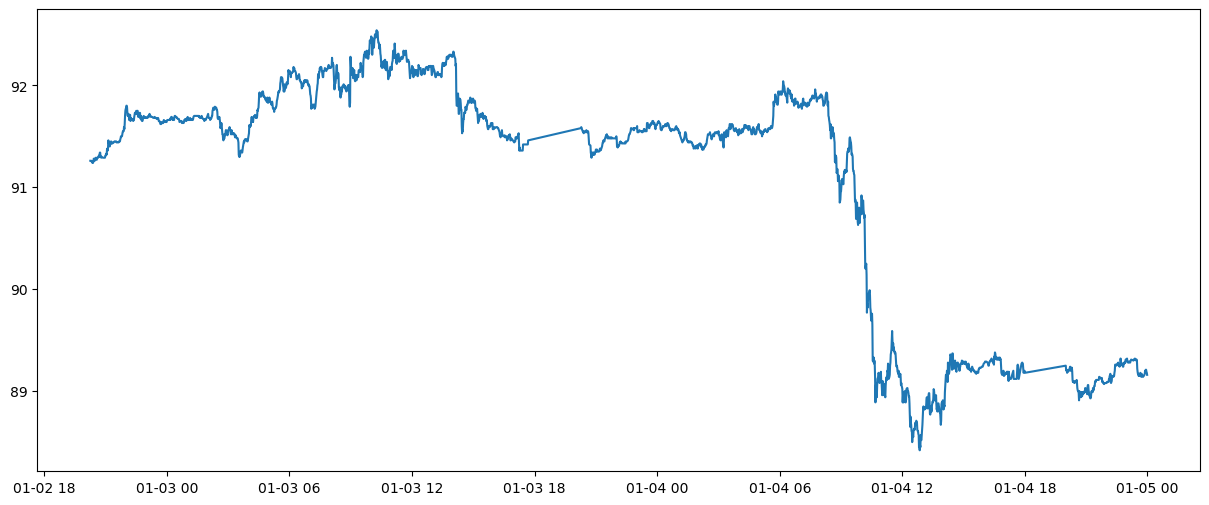

In [195]:
plt.figure(figsize = (15, 6))
plt.plot(df_2011.Close, linestyle = '-')

In [196]:
# ADF Test
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    
perform_adf_test(df_2011.Close)

ADF Statistic: -0.084685
p-value: 0.950943


In [197]:
perform_adf_test(df_2011.Close.diff().dropna())

ADF Statistic: -21.360781
p-value: 0.000000


<BarContainer object of 15 artists>

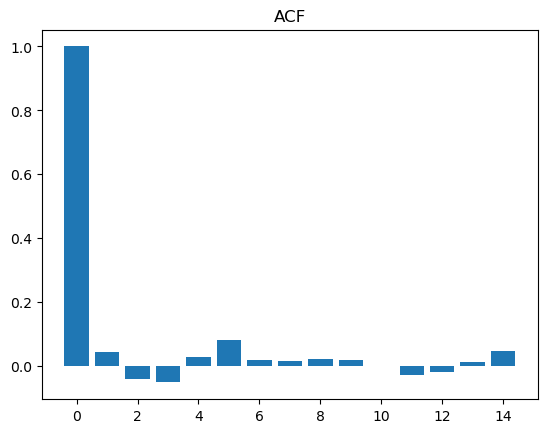

In [198]:
## ACF
num_lags = 15
acf_vals = acf(df_2011.Close.diff().dropna())
plt.title("ACF")
plt.bar(range(num_lags), acf_vals[:num_lags])

<BarContainer object of 15 artists>

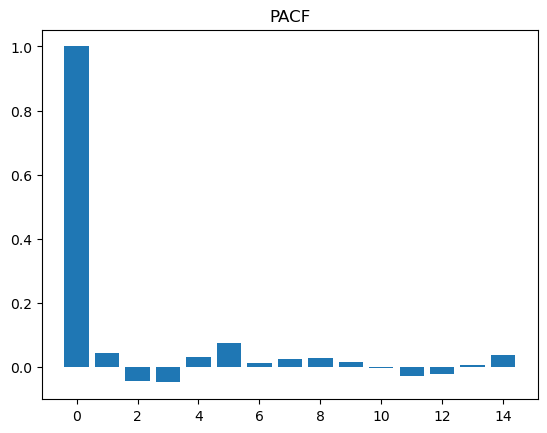

In [199]:
## PACF
pacf_vals = pacf(df_2011.Close.diff().dropna())
plt.title("PACF")
plt.bar(range(num_lags), pacf_vals[:num_lags])

In [200]:
# define model ARMA(3, 3)
model = ARIMA(df_2011.Close.diff().dropna(), order=(3,0, 3))
model_fit = model.fit()
model_fit.summary()

C:\Users\Casey\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Casey\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Casey\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Casey\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2597
Model:                 ARIMA(3, 0, 3)   Log Likelihood                4865.303
Date:                Thu, 23 May 2024   AIC                          -9714.606
Time:                        13:46:49   BIC                          -9667.709
Sample:                             0   HQIC                         -9697.613
                               - 2597                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0009      0.001     -1.123      0.261      -0.002       0.001
ar.L1         -0.2976      0.483     -0.617      0.537      -1.244       0.648
ar.L2         -0.5213      0.128     -4.071      0.000      -0.772      -0.270
ar.L3         -0.2693      0.352     -0.765      0.444      -0.959       0.421
ma.L1          0.3460      0.484      0.715      0.475      -0.603       1.295
ma.L2          0.5055      0.120      4.210      0.000       0.270       0.741
ma.L3          0.2233      0.338      0.660      0.509      -0.440       0.886
sigma2         0.0014   1.33e-05    104.045      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):             43778.20
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               2.35   Skew:                            -0.59
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

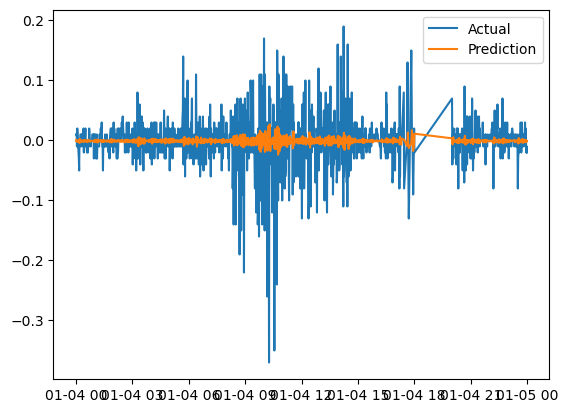

In [212]:
plt.plot(df[pd.to_datetime('2011-01-03 23:59:00'):pd.to_datetime('2011-01-04 23:59:00')].Close.diff().dropna(), label = "Actual")
plt.plot(predictions, label = "Prediction")
plt.legend()

In [213]:
np.corrcoef(df[pd.to_datetime('2011-01-03 23:59:00'):pd.to_datetime('2011-01-04 23:59:00')].Close.diff().dropna(), predictions)

array([[1.        , 0.08572759],
       [0.08572759, 1.        ]])